<h2>Reading in chunks with Pandas</h2>

Data was found <a href="http://academictorrents.com/details/a2ccf94bbb4af222bf8e69dad60a68a29f310d9a">here</a>

In [1]:
import pandas as pd

In [2]:
flightit = pd.read_csv('../data/flight_red.tsv',sep='\t',chunksize=10000,header=None)

In [98]:
chunk = flightit.next()

In [99]:
chunk.shape

(10000, 11)

In [100]:
chunk.head()

,0,1,2,3,4,5,6,7,8,9,10
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034


In [83]:
def proc_chunk(chunk):
    chunk = chunk.rename(columns=lambda i: ['Origin','Dest','Origin City','Dest City',
                                            'Passengers','Seats','Flights','Distance',
                                            'Date','Origin Pop','Dest Pop'][i])
    cgo = chunk.groupby('Origin')
    cstats = cgo.sum()[['Passengers','Seats','Flights','Distance']]
    cstats['Count'] = cgo.count()['Dest']
    return cstats

In [101]:
cstats = proc_chunk(chunk)

In [102]:
cstats.head()

,Passengers,Seats,Flights,Distance,Count
Origin,,,,,
ABI,9938,12034,98,90440.0,85
ABQ,24561,28611,232,81720.0,126
ABR,307,362,3,2796.0,3
ACT,14315,16498,134,134532.0,111
ACV,752,1038,9,3752.0,9


In [103]:
for chunk in flightit:
    cstats2 = proc_chunk(chunk)
    cstats = cstats.add(cstats2,fill_value=0)

In [104]:
cstats.head()

,Passengers,Seats,Flights,Distance,Count
Origin,,,,,
1B1,1.0,8.0,1.0,58.0,1.0
ABE,8044200.0,14569223.0,197049.0,2930852.0,8141.0
ABI,979555.0,1742819.0,50043.0,406329.0,1635.0
ABQ,59884118.0,89411749.0,758168.0,14007329.0,21788.0
ABR,457012.0,973824.0,30832.0,144498.0,824.0


In [108]:
cstats.shape

(683, 6)

In [105]:
cstats.describe()

,Passengers,Seats,Flights,Distance,Count
count,6.830000e+02,6.830000e+02,6.830000e+02,6.830000e+02,683.000000
mean,1.419966e+07,2.137835e+07,1.965993e+05,3.682419e+06,5280.824305
std,5.342213e+07,7.862627e+07,6.627441e+05,1.296567e+07,16187.972608
min,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,1.000000
25%,1.300000e+01,4.650000e+01,1.200000e+01,4.145000e+03,9.000000
50%,2.153000e+04,8.337200e+04,4.527000e+03,4.999200e+04,202.000000
75%,1.483796e+06,2.650434e+06,5.916050e+04,5.054350e+05,1713.000000
max,5.771243e+08,8.254061e+08,6.908482e+06,1.203680e+08,158496.000000


In [106]:
cstats['Ave Dist'] = cstats['Distance'] / cstats['Count']

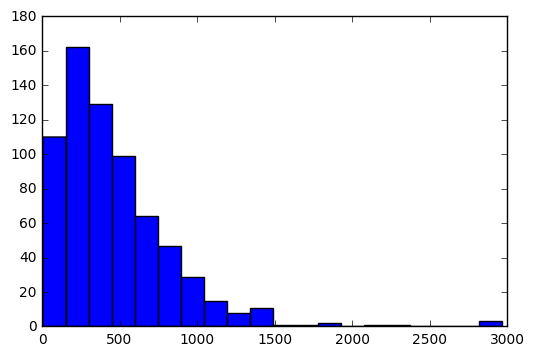

In [107]:
from matplotlib import pyplot as plt
plt.hist(cstats['Ave Dist'],bins=20)
plt.show()

In [95]:
cstats[cstats['Ave Dist'] > 2500]

,Passengers,Seats,Flights,Distance,Count,Ave Dist
Origin,,,,,,
HCA,0.0,9.0,1.0,2968.0,1.0,2968.000000
HIK,2698.0,6997.0,54.0,137963.0,47.0,2935.382979
MDD,0.0,38.0,2.0,2932.0,1.0,2932.000000


We deem the most remote active airport to be the Pearl Harbor base airport. 